1. Processing the data.

In [41]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\uczelnia\semestr_5\AiBD\cw\lab_5\Analysis Data\tb_processed.csv')

2. Generating a plot showing all tuberculosis cases by age and sex.

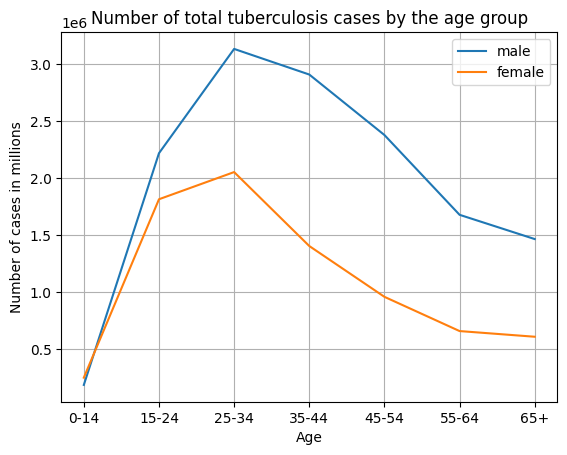

In [45]:
# plot showing all tuberculosis cases in all age groups and in both sexes
all_cases_m014 = df.new_sp_m014.sum()
all_cases_m1524 = df.new_sp_m1524.sum()
all_cases_m2534 = df.new_sp_m2534.sum()
all_cases_m3544 = df.new_sp_m3544.sum()
all_cases_m4554 = df.new_sp_m4554.sum()
all_cases_m5564 = df.new_sp_m5564.sum()
all_cases_m65 = df.new_sp_m65.sum()
all_cases_f014 = df.new_sp_f014.sum()
all_cases_f1524 = df.new_sp_f1524.sum()
all_cases_f2534 = df.new_sp_f2534.sum()
all_cases_f3544 = df.new_sp_f3544.sum()
all_cases_f4554 = df.new_sp_f4554.sum()
all_cases_f5564 = df.new_sp_f5564.sum()
all_cases_f65 = df.new_sp_f65.sum()

all_cases_male = [all_cases_m014, all_cases_m1524, all_cases_m2534, all_cases_m3544, all_cases_m4554, all_cases_m5564, all_cases_m65]
all_cases_female = [all_cases_f014, all_cases_f1524, all_cases_f2534, all_cases_f3544, all_cases_f4554, all_cases_f5564, all_cases_f65]

labels=['0-14','15-24','25-34','35-44','45-54','55-64','65+']

plt.figure()
plt.plot(all_cases_male)
plt.plot(all_cases_female)
plt.xticks(ticks=range(len(labels)),labels=labels)
plt.xlabel('Age')
plt.ylabel('Number of cases in millions')
plt.title("Number of total tuberculosis cases by the age group")
plt.legend(["male","female"])
plt.grid()
plt.show()

3. Generating a plot showing development of tuberculosis over the years.

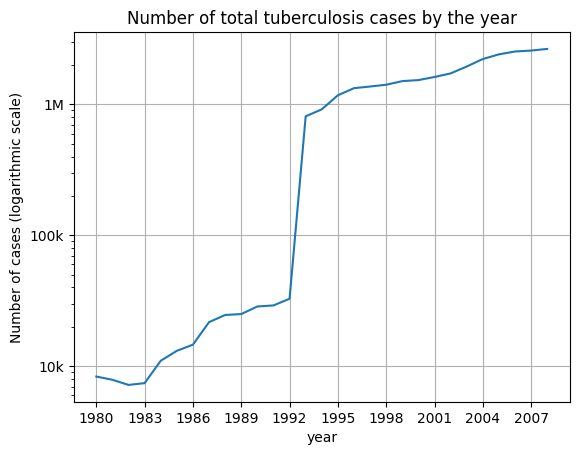

In [44]:
cases_in_each_year = {1980:0,1981:0,1982:0,1983:0,1984:0,1985:0,1986:0,1987:0,1988:0,1989:0,
                      1990:0,1991:0,1992:0,1993:0,1994:0,1995:0,1996:0,1997:0,1998:0,1999:0,
                      2000:0,2001:0,2002:0,2003:0,2004:0,2005:0,2006:0,2007:0,2008:0}
for idx, row in df.iterrows():
    cases_in_each_year[row.year] = cases_in_each_year[row.year] + row.new_sp

plt.figure()
plt.semilogy(list(cases_in_each_year.values()))
plt.xticks(range(0,len(cases_in_each_year),3),list(cases_in_each_year.keys())[::3])
plt.yticks([10**4,10**5,10**6],['10k','100k','1M'])
plt.xlabel('year')
plt.ylabel('Number of cases (logarithmic scale)')
plt.title("Number of total tuberculosis cases by the year")
plt.grid()
plt.show()


3. Generating an example plot for two countries with most total cases.

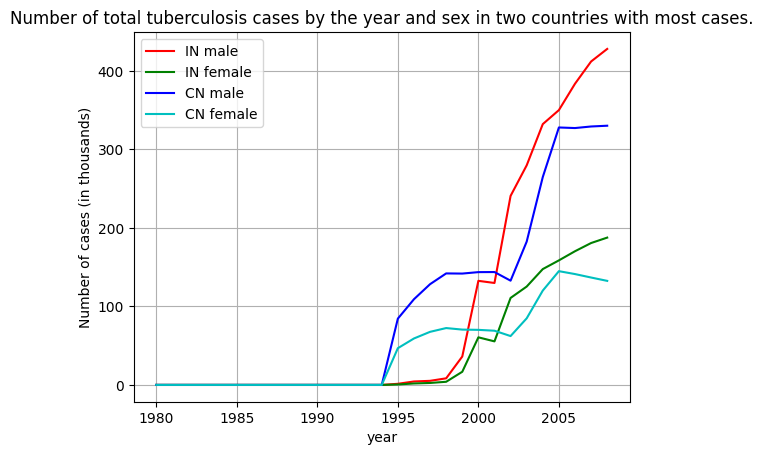

In [46]:
countries = set()
for idx, country in enumerate(df.iso2):
    countries.add(country)

countries_dict = {}
for el in countries:
    if el == 0.0:
        el = 'NaN'
    countries_dict[el] = {'male': {1980:0,1981:0,1982:0,1983:0,1984:0,1985:0,1986:0,1987:0,1988:0,1989:0,
                                   1990:0,1991:0,1992:0,1993:0,1994:0,1995:0,1996:0,1997:0,1998:0,1999:0,
                                   2000:0,2001:0,2002:0,2003:0,2004:0,2005:0,2006:0,2007:0,2008:0},
                          'female': {1980:0,1981:0,1982:0,1983:0,1984:0,1985:0,1986:0,1987:0,1988:0,1989:0,
                                   1990:0,1991:0,1992:0,1993:0,1994:0,1995:0,1996:0,1997:0,1998:0,1999:0,
                                   2000:0,2001:0,2002:0,2003:0,2004:0,2005:0,2006:0,2007:0,2008:0},
                          'sum': 0
                          }

for idx, row in df.iterrows():
    if row.iso2 == 0.0:
        row.iso2 = 'NaN'
    countries_dict[row.iso2]['male'][row.year] = row.new_sp_m014 + row.new_sp_m1524 + row.new_sp_m2534 + row.new_sp_m3544 + row.new_sp_m4554 + row.new_sp_m5564 + row.new_sp_m65 + row.new_sp_mu
    countries_dict[row.iso2]['female'][row.year] = row.new_sp_f014 + row.new_sp_f1524 + row.new_sp_f2534 + row.new_sp_f3544 + row.new_sp_f4554 + row.new_sp_f5564 + row.new_sp_f65 + row.new_sp_fu
    countries_dict[row.iso2]['sum'] = countries_dict[row.iso2]['sum'] + countries_dict[row.iso2]['male'][row.year] + countries_dict[row.iso2]['female'][row.year]


most_cases = [(None, -1),(None, -1)]
for country_name, country_data in countries_dict.items():
    if country_data['sum'] > most_cases[1][1]:
        most_cases[0] = most_cases[1]
        most_cases[1] = (country_name, country_data['sum'])
    elif country_data['sum'] > most_cases[0][1]:
        most_cases[0] = (country_name, country_data['sum'])

legend = []
colors = ['r','g','b','c']
i = 0
plt.figure()
for country_name,_ in most_cases:
    plt.plot(list(countries_dict[country_name]['male'].values()), colors[i])
    legend.append(f'{country_name} male')
    plt.plot(list(countries_dict[country_name]['female'].values()), colors[i+1])
    legend.append(f'{country_name} female')
    i += 2
plt.xticks(range(0,len(cases_in_each_year),5),list(cases_in_each_year.keys())[::5])
plt.yticks([0,10**5,2*10**5,3*10**5,4*10**5],['0','100','200','300','400'])
plt.xlabel('year')
plt.ylabel('Number of cases (in thousands)')
plt.legend(legend)
plt.title("Number of total tuberculosis cases by the year and sex in two countries with most cases.")
plt.grid()
plt.show()